In [ ]:
#hide
#from biuR.wrapper import R

# biuR

> An extract of the BIU R functionality, without any dependency on [biu](https://github.com/thiesgehrmann/biuR).

## Install

`pip install biuR`

## How to use

In [ ]:
import biur
import matplotlib.pylab as plt
import pandas as pd

In [ ]:
R = biur.wrapper.R()

## Push some data

In [ ]:
R.push(n=5000, mean=10, var=6, question="How many apples do you eat per day?")

## Run some commands

In [ ]:
R("""
    dist <- rnorm(n, mean, var)
    print(mean(dist))
""", get=False)

[1] 10.06651


## Get some data

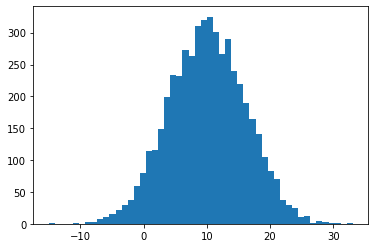

In [ ]:
dist = R.get("dist")
dist_alt = R("dist", get=True) # the get parameter is True by default
_ = plt.hist(dist, bins=50)

## Do it all at the same time

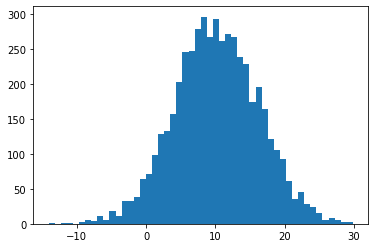

In [ ]:
dist = R("""rnorm(n, mean, var)""",
         push=dict(n=5000, mean=10, var=6, question="How many apples do you eat per day?"))
_ = plt.hist(dist, bins=50)

## Dataframes also work as expected

In [ ]:
df  = pd.DataFrame(dist.reshape(500,10), columns=["C%d" % (i+1) for i in range(10)])
df2 = R("""df*2""", push=dict(df=df))
df2.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,19.664014,19.844730,21.397676,20.316715,19.915327,20.479617,20.606811,20.671680,19.978792,20.363389
std,12.082482,11.829318,11.756079,12.228085,11.878440,12.626452,11.560421,12.360558,12.425381,12.545196
min,-28.185781,-11.851668,-14.899577,-15.940758,-23.651277,-17.811376,-13.721199,-17.615716,-18.421257,-22.172515
25%,11.909300,12.042162,13.257103,12.162031,12.214617,11.778717,12.920449,12.178726,11.741882,12.254866
50%,19.316743,19.564965,20.988669,20.498992,19.765990,20.166144,20.278277,20.020587,20.054040,20.275403
75%,27.771991,28.085157,29.174137,28.447980,28.061103,28.312460,28.384447,28.869581,28.670938,29.319559
max,53.658666,59.740534,58.531887,57.402270,55.351012,52.867132,56.286094,55.596513,50.953409,58.989365


## Some additional stuff

### Dates

In [ ]:
from datetime import datetime
R("""print(today)""", push=dict(today=datetime.today()), get=False)

[1] "2021-11-15 14:59:14 EET"


### Dictionaries

> Note that individual numbers do not exist in R (everything is a vector) so it is impossible to transform this back perfectly.

In [ ]:
R.push(mydict={"A":10, "B":20, "C":40})
R("""
    mydict$D <- 60
    mydict""")

{'A': [10], 'B': [20], 'C': [40], 'D': [60.0]}